In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error

In [2]:
# load datasets
with open("./zhengqi_train.txt") as fr:
    train_data = pd.read_csv(fr, sep="\t")
with open("./zhengqi_test.txt") as fr_test:
    test_data = pd.read_csv(fr_test, sep="\t")

In [3]:
test_data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


In [4]:
train_data["origin"] = "train"
test_data["origin"] = "test"
all_data = pd.concat([train_data, test_data], sort=True, ignore_index=True)
all_data

,V0,V1,V10,V11,V12,V13,V14,V15,V16,V17,...,V36,V37,V4,V5,V6,V7,V8,V9,origin,target
0,0.566,0.016,-0.940,-0.307,-0.073,0.550,-0.484,0.000,-1.707,-1.162,...,-2.608,-3.508,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,train,0.175
1,0.968,0.437,0.188,-0.455,-0.134,1.109,-0.488,0.000,-0.977,-1.162,...,-0.335,-0.730,0.194,-0.893,-1.566,-2.360,0.332,-2.114,train,0.676
2,1.013,0.568,0.874,-0.051,-0.072,0.767,-0.493,-0.212,-0.618,-0.897,...,0.765,-0.589,0.112,-0.797,-1.367,-2.360,0.396,-2.114,train,0.633
3,0.733,0.368,0.011,0.102,-0.014,0.769,-0.371,-0.162,-0.429,-0.897,...,0.333,-0.112,0.599,-0.679,-1.200,-2.086,0.403,-2.114,train,0.206
4,0.684,0.638,-0.251,0.570,0.199,-0.349,-0.342,-0.138,-0.391,-0.897,...,-0.280,-0.028,0.337,-0.454,-1.073,-2.086,0.314,-2.114,train,0.384
5,0.445,0.627,-0.511,-0.564,0.294,0.912,-0.345,0.111,-0.333,-1.029,...,-0.191,-0.883,0.458,-1.056,-1.009,-1.896,0.481,-2.114,train,0.060
6,0.889,0.416,-0.256,-0.278,0.425,0.632,-0.300,0.111,-0.333,-1.428,...,-0.155,-1.318,0.224,-0.893,-0.812,-1.823,0.729,-2.114,train,0.415
7,0.984,0.529,-0.067,-0.240,0.272,0.780,-0.387,0.244,0.065,-1.162,...,0.100,-0.899,0.258,-0.917,-0.682,-1.721,0.753,-2.114,train,0.609
8,0.948,0.850,0.205,0.422,0.387,-0.288,-0.264,0.293,0.166,-1.162,...,0.053,-0.553,0.591,-0.523,-0.591,-1.524,0.763,-2.114,train,0.981
9,1.157,1.055,0.145,0.179,0.688,-0.140,-0.289,0.317,0.195,-0.897,...,0.151,-1.157,1.483,-0.731,-0.612,-1.524,0.968,-2.114,train,0.818


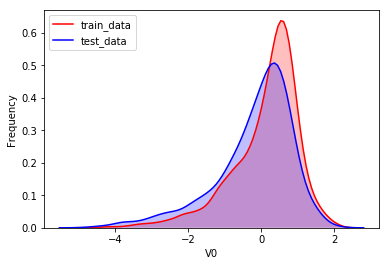

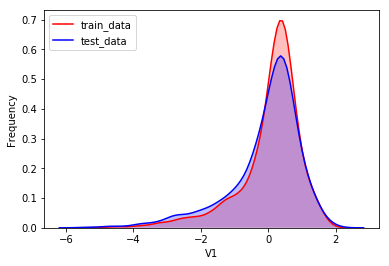

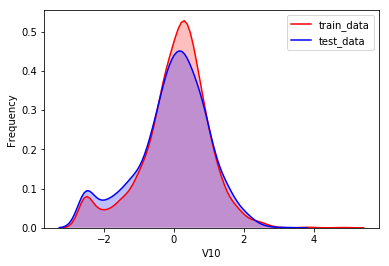

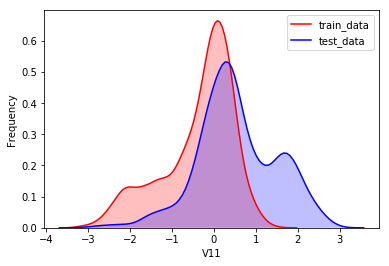

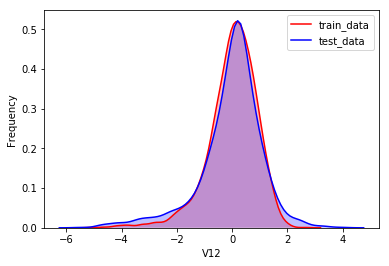

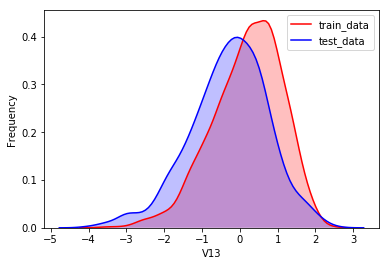

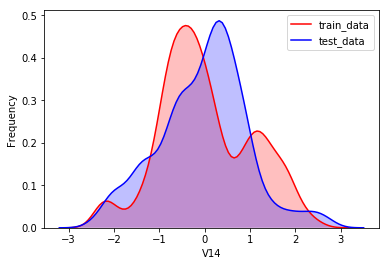

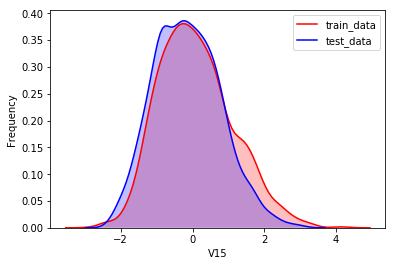

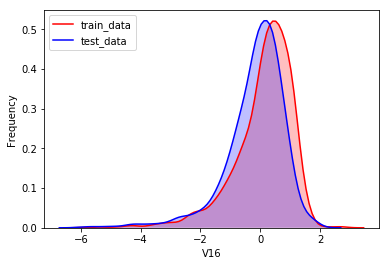

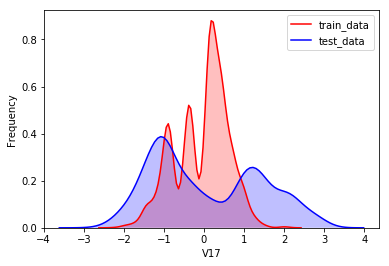

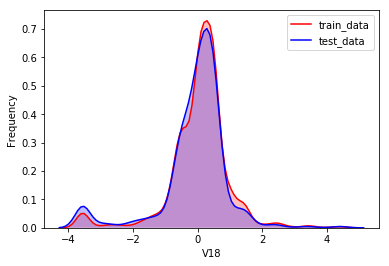

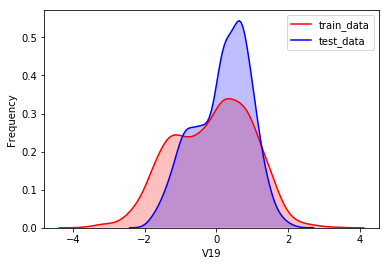

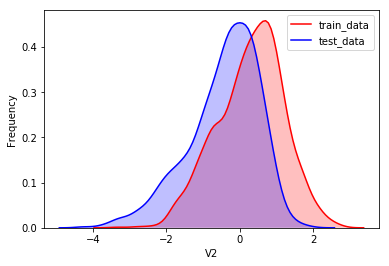

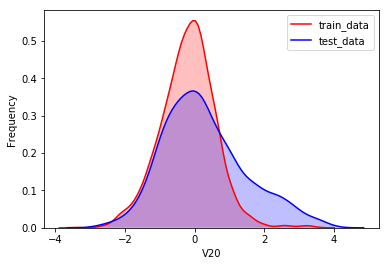

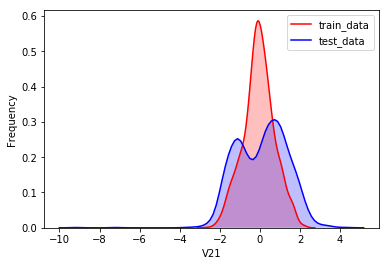

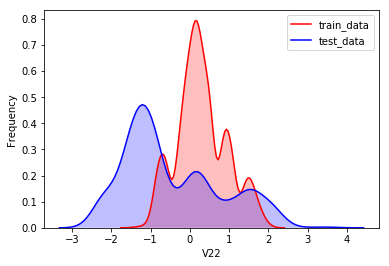

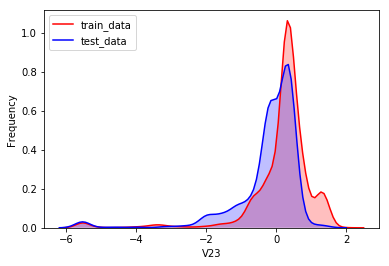

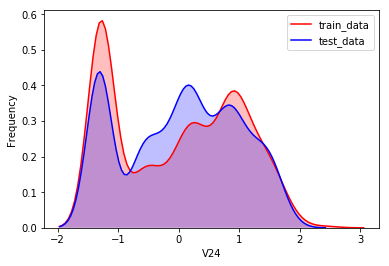

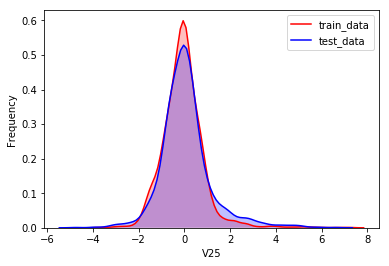

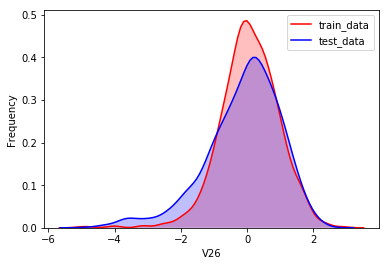

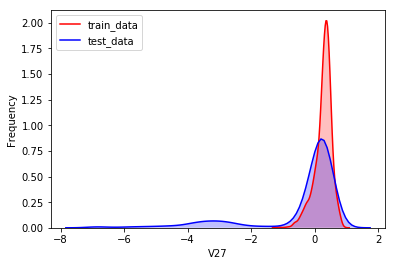

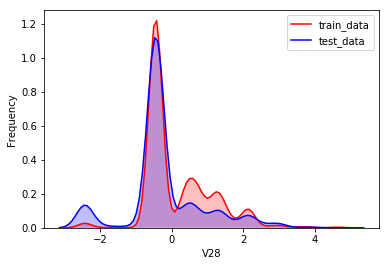

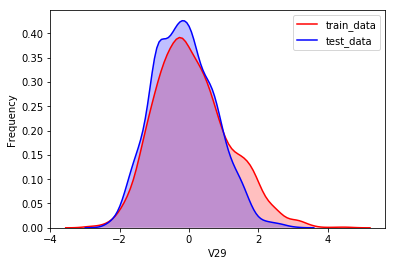

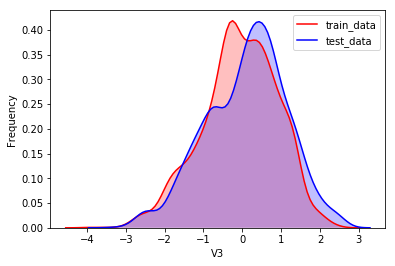

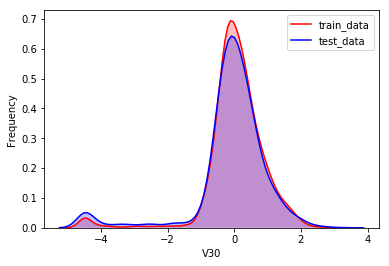

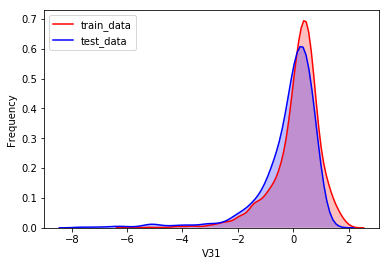

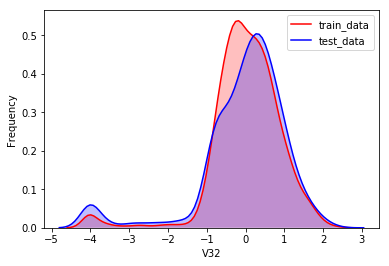

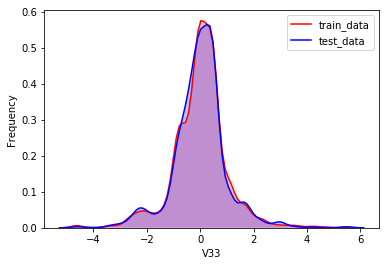

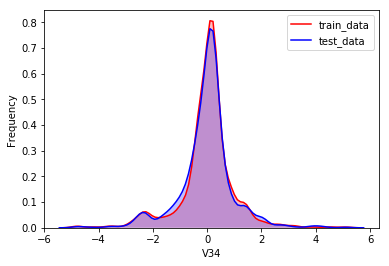

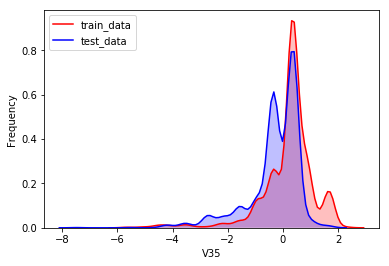

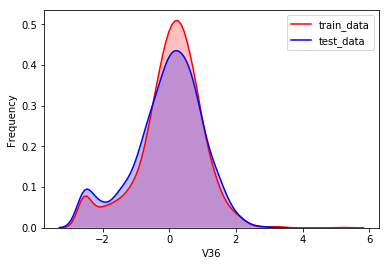

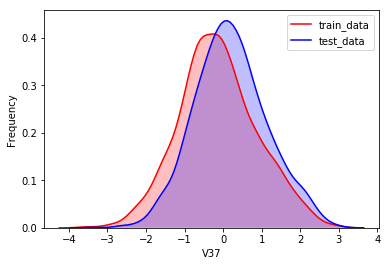

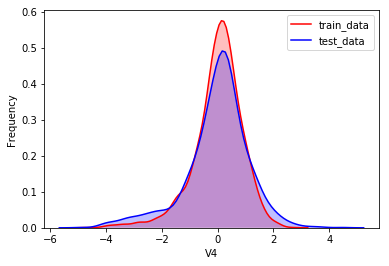

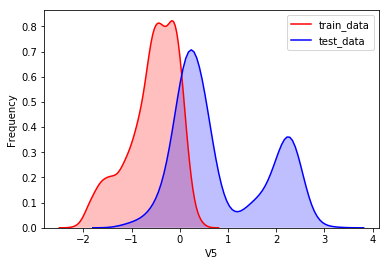

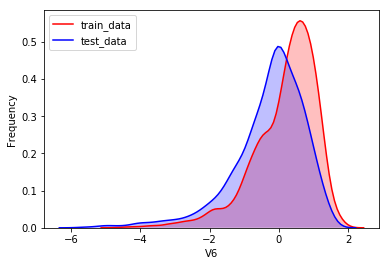

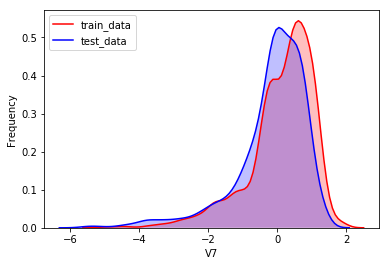

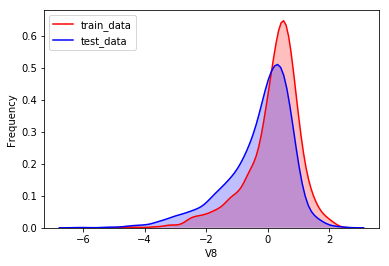

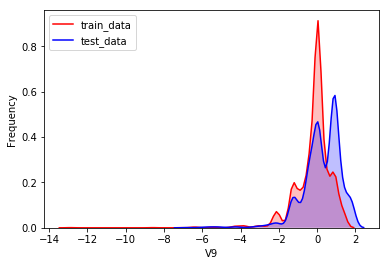

In [5]:
for column in all_data.columns[:-2]:
    g = sns.kdeplot(all_data[column][(all_data["origin"]=="train")], color="Red", shade=True)
    g = sns.kdeplot(all_data[column][(all_data["origin"]=="test")], color="Blue", shade=True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train_data", "test_data"])
    plt.show()

In [6]:
drop_cols = ["V5", "V9", "V11", "V17", "V22"]
all_data = all_data.drop(drop_cols, axis=1)

In [7]:
all_data.columns

Index(['V0', 'V1', 'V10', 'V12', 'V13', 'V14', 'V15', 'V16', 'V18', 'V19',
       'V2', 'V20', 'V21', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V3', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V4',
       'V6', 'V7', 'V8', 'origin', 'target'],
      dtype='object')

In [8]:
poly = PolynomialFeatures(2, include_bias=False, interaction_only=False)
poly_data = poly.fit_transform(all_data.drop(["origin", "target"], axis=1))

In [9]:
poly_data = pd.DataFrame(poly_data, columns=poly.get_feature_names())

In [10]:
poly_data["origin"] = all_data["origin"]
poly_data["label"] = all_data["target"]

In [11]:
poly_data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29 x31,x29 x32,x30^2,x30 x31,x30 x32,x31^2,x31 x32,x32^2,origin,label
0,0.566,0.016,-0.940,-0.073,0.550,-0.484,0.000,-1.707,-0.573,-0.991,...,-1.066720,-0.197072,3.283344,4.276320,0.790032,5.569600,1.028960,0.190096,train,0.175
1,0.968,0.437,0.188,-0.134,1.109,-0.488,0.000,-0.977,-0.571,-0.836,...,-0.457840,0.064408,2.452356,3.695760,-0.519912,5.569600,-0.783520,0.110224,train,0.676
2,1.013,0.568,0.874,-0.072,0.767,-0.493,-0.212,-0.618,-0.564,-0.558,...,-0.264320,0.044352,1.868689,3.226120,-0.541332,5.569600,-0.934560,0.156816,train,0.633
3,0.733,0.368,0.011,-0.014,0.769,-0.371,-0.162,-0.429,-0.574,-0.564,...,-1.249514,0.241397,1.440000,2.503200,-0.483600,4.351396,-0.840658,0.162409,train,0.206
4,0.684,0.638,-0.251,0.199,-0.349,-0.342,-0.138,-0.391,-0.572,-0.394,...,-0.702982,0.105818,1.151329,2.238278,-0.336922,4.351396,-0.655004,0.098596,train,0.384
5,0.445,0.627,-0.511,0.294,0.912,-0.345,0.111,-0.333,-0.573,-0.516,...,-0.868368,0.220298,1.018081,1.913064,-0.485329,3.594816,-0.911976,0.231361,train,0.060
6,0.889,0.416,-0.256,0.425,0.632,-0.300,0.111,-0.333,-0.586,-0.544,...,-0.408352,0.163296,0.659344,1.480276,-0.591948,3.323329,-1.328967,0.531441,train,0.415
7,0.984,0.529,-0.067,0.272,0.780,-0.387,0.244,0.065,-0.579,-0.465,...,-0.444018,0.194274,0.465124,1.173722,-0.513546,2.961841,-1.295913,0.567009,train,0.609
8,0.948,0.850,0.205,0.387,-0.288,-0.264,0.293,0.166,-0.566,-0.173,...,-0.900684,0.450933,0.349281,0.900684,-0.450933,2.322576,-1.162812,0.582169,train,0.981
9,1.157,1.055,0.145,0.688,-0.140,-0.289,0.317,0.195,-0.567,-0.557,...,-2.260092,1.435544,0.374544,0.932688,-0.592416,2.322576,-1.475232,0.937024,train,0.818


In [12]:
new_train_data = poly_data[poly_data["origin"] == "train"].drop("origin", axis=1)

In [13]:
columns = new_train_data.columns.tolist()
mcorr = new_train_data[columns].corr(method="spearman")

In [15]:
threshold = 0.2
corr_matrix = mcorr.abs()
drop_cols = corr_matrix[corr_matrix["label"]<threshold].index

In [16]:
poly_data.drop(drop_cols, axis=1, inplace=True)

In [22]:
# 特征归一化
cols_numeric = list(poly_data.columns)
cols_numeric.remove("origin")
def scale_minmax(col):
    return (col - col.min()) / (col.max() - col.min())
scale_cols = [col for col in cols_numeric if col != "label"]
poly_data[scale_cols] = poly_data[scale_cols].apply(scale_minmax, axis=0)

In [23]:
poly_data

,x0,x1,x2,x3,x6,x7,x10,x11,x14,x17,...,x19 x32,x20 x26,x22 x26,x22 x29,x26 x29,x26 x32,x27^2,x29 x32,origin,label
0,0.775775,0.723449,0.221743,0.570828,0.402245,0.487950,0.582197,0.537946,0.569153,0.902936,...,0.709067,0.222111,0.448997,0.381867,0.149595,0.280164,0.247904,0.286200,train,0.175
1,0.833742,0.778785,0.373887,0.564418,0.402245,0.569779,0.611588,0.534996,0.569419,0.924734,...,0.709716,0.335894,0.357932,0.393889,0.208794,0.217234,0.004090,0.298257,train,0.676
2,0.840231,0.796004,0.466415,0.570933,0.372870,0.610021,0.635354,0.533387,0.611893,0.923195,...,0.711219,0.332337,0.360531,0.394939,0.208051,0.217931,0.021330,0.297332,train,0.633
3,0.799856,0.769716,0.350013,0.577028,0.379798,0.631207,0.642104,0.492625,0.737722,0.916912,...,0.711590,0.328616,0.360552,0.400697,0.212467,0.218007,0.004042,0.306419,train,0.206
4,0.792790,0.805205,0.314675,0.599412,0.383123,0.635467,0.638869,0.470367,0.590656,0.923965,...,0.713575,0.329415,0.361071,0.398303,0.210091,0.217038,0.002857,0.300167,train,0.384
5,0.758327,0.803759,0.279606,0.609395,0.417625,0.641968,0.659682,0.460043,0.568622,0.927042,...,0.719787,0.329614,0.361390,0.400563,0.211188,0.218857,0.001330,0.305446,train,0.060
6,0.822350,0.776025,0.314001,0.623161,0.417625,0.641968,0.692308,0.477072,0.569419,0.932812,...,0.724134,0.332083,0.360170,0.395930,0.209066,0.221558,0.000876,0.302817,train,0.415
7,0.836049,0.790878,0.339493,0.607083,0.436054,0.686582,0.701308,0.490212,0.568622,0.933838,...,0.715397,0.333571,0.362132,0.398298,0.209374,0.221819,0.000364,0.304246,train,0.609
8,0.830858,0.833070,0.376180,0.619168,0.442843,0.697904,0.684433,0.489676,0.568622,0.944224,...,0.716894,0.333952,0.363924,0.408553,0.212394,0.221928,0.000102,0.316081,train,0.981
9,0.860995,0.860016,0.368087,0.650799,0.446169,0.701155,0.692026,0.491419,0.194319,0.947044,...,0.743496,0.336819,0.367308,0.451095,0.220483,0.224161,0.000831,0.361484,train,0.818


In [24]:
poly_data.describe()

,x0,x1,x2,x3,x6,x7,x10,x11,x14,x17,...,x19 x31,x19 x32,x20 x26,x22 x26,x22 x29,x26 x29,x26 x32,x27^2,x29 x32,label
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,...,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,2888.000000
mean,0.694172,0.721357,0.348518,0.578507,0.402251,0.679294,0.602300,0.456147,0.356712,0.881401,...,0.588687,0.710049,0.327106,0.364251,0.405409,0.207959,0.220988,0.036441,0.313009,0.126353
std,0.144198,0.131443,0.134882,0.105088,0.138561,0.112095,0.140628,0.134083,0.265512,0.128221,...,0.066111,0.048225,0.065147,0.042870,0.045182,0.031541,0.044846,0.059319,0.059913,0.983966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626676,0.679416,0.284327,0.532892,0.299016,0.629414,0.514414,0.370475,0.040616,0.888575,...,0.570329,0.698265,0.308853,0.352730,0.390358,0.200850,0.207693,0.002677,0.291180,-0.350250
50%,0.729488,0.752497,0.366469,0.591635,0.391437,0.700258,0.617072,0.447305,0.381736,0.916015,...,0.599593,0.710411,0.324206,0.358913,0.395933,0.207108,0.215216,0.012303,0.298106,0.313000
75%,0.790195,0.799553,0.432965,0.641971,0.489954,0.753279,0.700464,0.522660,0.574728,0.932555,...,0.613848,0.721605,0.339614,0.365324,0.410578,0.212669,0.222505,0.039954,0.317161,0.793250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


In [25]:
df_train = poly_data[poly_data["origin"]=="train"]

y = df_train.label
X = df_train.drop(["origin", "label"], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=100)

In [26]:
def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
y_pred = model.predict(X_valid)
print(mse(y_valid, y_pred))

0.12388334717511774


In [29]:
print(mse(y_train, model.predict(X_train)))

0.09508538048501122


In [30]:
df_test = poly_data[poly_data["origin"] == "test"].reset_index(drop=True)
df_test.drop(["origin", "label"], axis=1, inplace=True)

In [31]:
df_test.shape

(1925, 103)

In [32]:
df_train.shape

(2888, 105)

In [34]:
ans = model.predict(df_test)

In [35]:
ans

array([ 0.26797926,  0.24728833, -0.07509321, ..., -3.70467578,
       -3.41817994, -3.77818513])

In [36]:
# 预测输出
pd.DataFrame(ans).to_csv("./PolyFeaturesLR2.txt", index=False, header=False)